In [502]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

# Step 1: Load and Explore the Data
## i. Load the dataset into a Pandas DataFrame.

In [505]:
df = pd.read_csv("C:\\Users\\NAYANA\\Downloads\\heart_disease.csv")

In [507]:
df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0   0     3       0  
2         0   0     3       0  
3         2   1     3       0  
4         1   3     2       0  
...     ...  ..   ...     ...  
1020      2   0     2       1  
1021      1   1     3       0  
1022      1   1     2       0  
1023      2   0     2       1  
1024      1   1     3       0  

[1025 rows x 14 columns]

## ii. Perform exploratory data analysis (EDA)

### a) Check for missing values, data types, and summary statistics

In [511]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [513]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [515]:
df.describe()

age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000     0.000000     0.000000   
25%       0.000000     0.000000   132.000000     0.000000     0.000000   
50%       0.000000     1.000000   152.000000     0.000000     0.800000   
75%       0.000000     1.000000   166.000000     1.000000     1.800000   
max       1.000000     2.000000   202.000000     1.000000     6.200000   

             slope           ca         thal       target  
count  1025.000000  1025.000000  1025.000000  1025.000000  
mean      1.385366     0.754146     2.323902     0.513171  
std       0.617755     1.030798     0.620660     0.500070  
min       0.000000     0.000000     0.000000     0.000000  
25%       1.000000     0.000000     2.000000     0.000000  
50%       1.000000     0.000000     2.000000     1.000000  
75%       2.000000     1.000000     3.000000     1.000000  
max       2.000000     4.000000     3.000000     1.000000

### b) Identify potential outliers in numerical columns

In [518]:
num_df = df.select_dtypes(include="number")
num_df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0   0     3       0  
2         0   0     3       0  
3         2   1     3       0  
4         1   3     2       0  
...     ...  ..   ...     ...  
1020      2   0     2       1  
1021      1   1     3       0  
1022      1   1     2       0  
1023      2   0     2       1  
1024      1   1     3       0  

[1025 rows x 14 columns]

In [520]:
print("Numercial columns are")
num_cols = num_df.columns.tolist()
print(num_cols)

Numercial columns are
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


<function matplotlib.pyplot.show(close=None, block=None)>

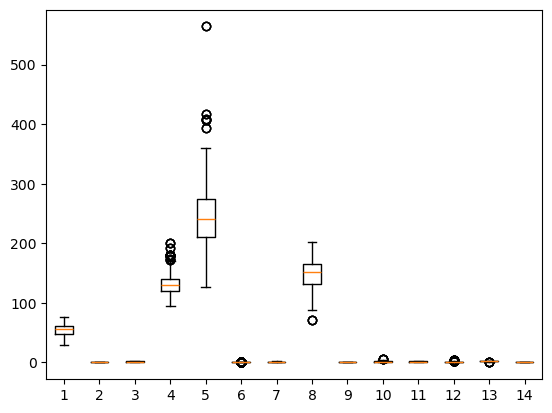

In [522]:
plt.boxplot(num_df)
plt.show

### c) Analyze the distribution of categorical variables

In [525]:
cat_df = df.select_dtypes(include="object")
cat_df

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[1025 rows x 0 columns]

In [527]:
print("Categorical columns are")
cat_cols = cat_df.columns.tolist()
print(cat_cols)

Categorical columns are
[]


#### There is no categorical columns, so analysing  the distribution of categorcial column is not possible.

# Step 2: Data Cleaning and Preprocessing

## i. Handling missing values(if needed)

### a) Replace missing numerical values with the mean/median.
### b) Replace missing categorical values with the mode.

In [533]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### Their are no missing values in the given dataset.

In [536]:
duplicated_rows=df.duplicated()
duplicated_rows

0       False
1       False
2       False
3       False
4       False
        ...  
1020     True
1021     True
1022     True
1023     True
1024     True
Length: 1025, dtype: bool

In [538]:
duplicated_rows.sum()

723

In [540]:
df=df[~duplicated_rows]
df.drop_duplicates(inplace=True)

C:\Users\NAYANA\AppData\Local\Temp\ipykernel_7704\46220804.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [542]:
df.shape

(302, 14)

In [544]:
import seaborn as sns

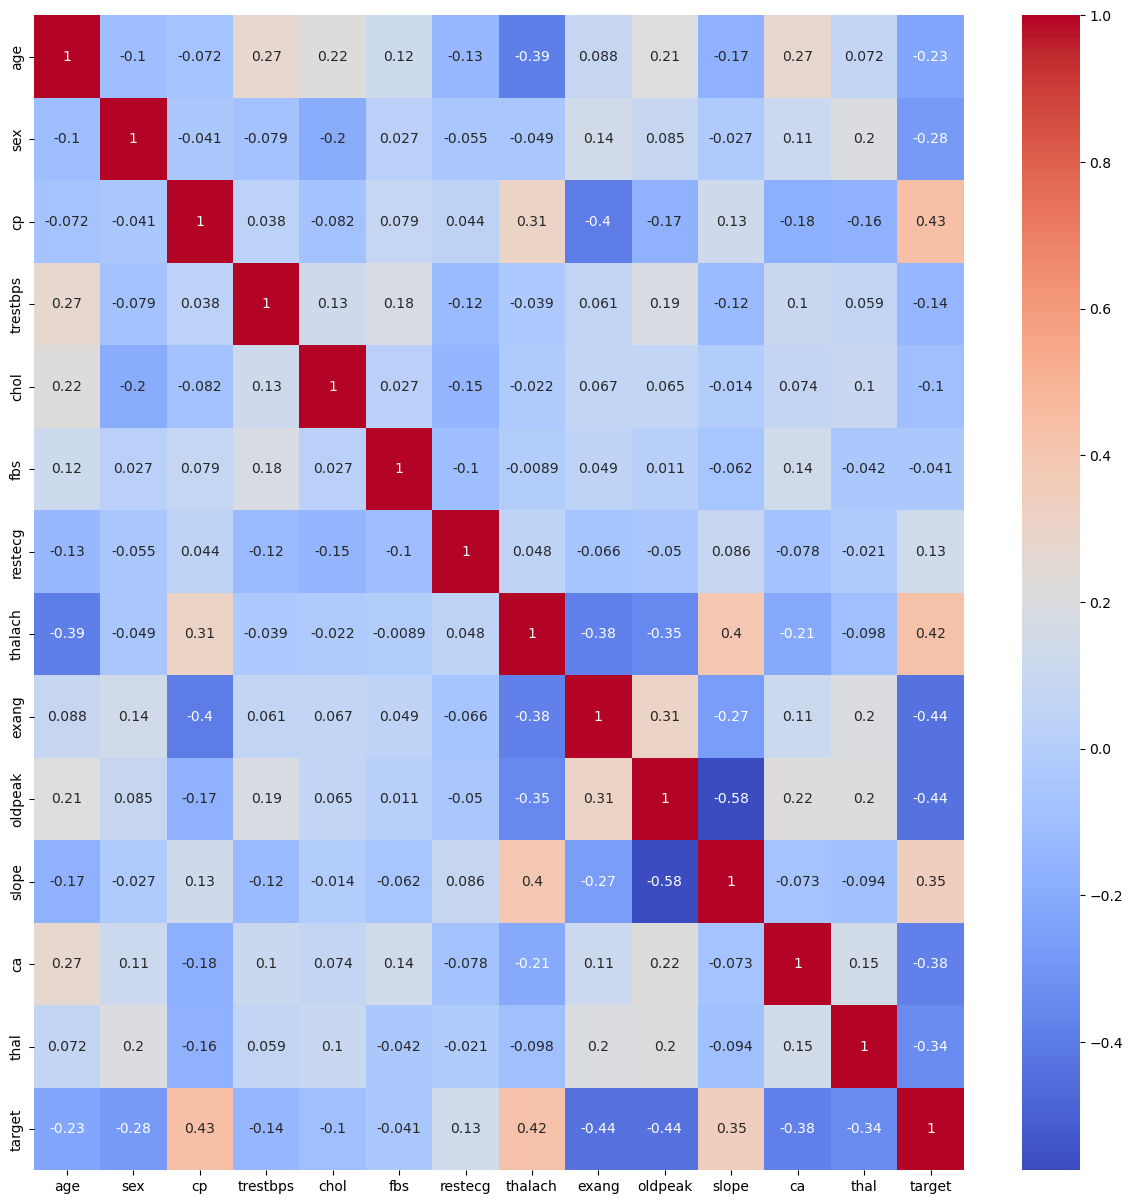

In [546]:
fig, ax=plt.subplots(figsize=(15,15))
sns.heatmap(num_df.corr(), ax=ax, annot=True, cmap='coolwarm')
plt.show()

## qii. Handle Outliers (if needed)
### Use appropriate methods (e.g., IQR or z-score) to detect and handle outliers

In [548]:
def replace_outliers(df, column_name):
    q1=df[column_name].quantile(0.25)
    q3=df[column_name].quantile(0.75)
    iqr=q3-q1
    upper_bound=q3+1.5*iqr
    lower_bound=q1-1.5*iqr
    df[column_name]=df[column_name].clip(upper=upper_bound)
    df[column_name]=df[column_name].clip(lower=lower_bound)
    return df[column_name]

In [549]:
for col in num_cols:
    num_df[col]=replace_outliers(num_df, col)

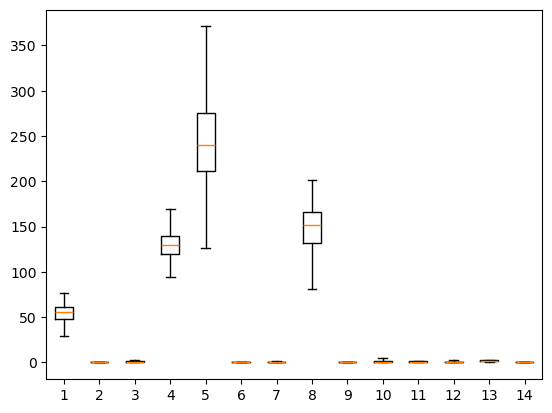

In [553]:
plt.boxplot(num_df)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

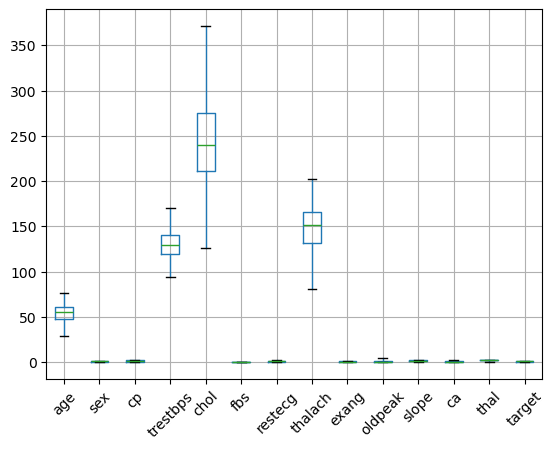

In [555]:
num_df.boxplot()
plt.xticks(rotation=45)
plt.show

## iii. Encode Categorical Variables:
### a) Use one-hot encoding for multi-category variables (chest pain type, resting electrocardiographic results, thal).

In [558]:
one_hot_enc = OneHotEncoder(sparse_output=False)
encoded_col=one_hot_enc.fit_transform(df[['cp', 'restecg', 'thal']])
encoded_col

array([[1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.]])

### b)Use binary encoding for sex and fasting blood sugar.

In [561]:
one_hot_enc=pd.DataFrame(encoded_col, columns=one_hot_enc.get_feature_names_out(['cp', 'restecg', 'thal']))
one_hot_enc

cp_0  cp_1  cp_2  cp_3  restecg_0  restecg_1  restecg_2  thal_0  thal_1  \
0     1.0   0.0   0.0   0.0        0.0        1.0        0.0     0.0     0.0   
1     1.0   0.0   0.0   0.0        1.0        0.0        0.0     0.0     0.0   
2     1.0   0.0   0.0   0.0        0.0        1.0        0.0     0.0     0.0   
3     1.0   0.0   0.0   0.0        0.0        1.0        0.0     0.0     0.0   
4     1.0   0.0   0.0   0.0        0.0        1.0        0.0     0.0     0.0   
..    ...   ...   ...   ...        ...        ...        ...     ...     ...   
297   0.0   0.0   1.0   0.0        1.0        0.0        0.0     0.0     0.0   
298   0.0   0.0   1.0   0.0        0.0        1.0        0.0     0.0     0.0   
299   1.0   0.0   0.0   0.0        0.0        1.0        0.0     0.0     0.0   
300   0.0   0.0   0.0   1.0        1.0        0.0        0.0     0.0     0.0   
301   1.0   0.0   0.0   0.0        0.0        1.0        0.0     0.0     0.0   

     thal_2  thal_3  
0       0.0     1.0  
1       0.0     1.0  
2       0.0     1.0  
3       0.0     1.0  
4       1.0     0.0  
..      ...     ...  
297     1.0     0.0  
298     1.0     0.0  
299     0.0     1.0  
300     1.0     0.0  
301     0.0     1.0  

[302 rows x 11 columns]

## iv. Scale Numerical Features
### Scale features such as resting blood pressure, serum cholesterol, maximum heart rate, and oldpeak using StandardScaler or MinMaxScaler.

In [564]:
from sklearn.preprocessing import StandardScaler

In [566]:
std_scaler = StandardScaler()
df['trestbps_std_scaler'] = std_scaler.fit_transform(df[['trestbps']])
df

C:\Users\NAYANA\AppData\Local\Temp\ipykernel_7704\501777450.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trestbps_std_scaler'] = std_scaler.fit_transform(df[['trestbps']])


age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     52    1   0       125   212    0        1      168      0      1.0   
1     53    1   0       140   203    1        0      155      1      3.1   
2     70    1   0       145   174    0        1      125      1      2.6   
3     61    1   0       148   203    0        1      161      0      0.0   
4     62    0   0       138   294    1        1      106      0      1.9   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
723   68    0   2       120   211    0        0      115      0      1.5   
733   44    0   2       108   141    0        1      175      0      0.6   
739   52    1   0       128   255    0        1      161      1      0.0   
843   59    1   3       160   273    0        0      125      0      0.0   
878   54    1   0       120   188    0        1      113      0      1.4   

     slope  ca  thal  target  trestbps_std_scaler  
0        2   2     3       0            -0.376556  
1        0   0     3       0             0.478910  
2        0   0     3       0             0.764066  
3        2   1     3       0             0.935159  
4        1   3     2       0             0.364848  
..     ...  ..   ...     ...                  ...  
723      1   0     2       1            -0.661712  
733      1   0     2       1            -1.346085  
739      2   1     3       0            -0.205463  
843      2   0     2       0             1.619532  
878      1   1     3       0            -0.661712  

[302 rows x 15 columns]

In [568]:
std_scaler = StandardScaler()
df['chol_std_scaler'] = std_scaler.fit_transform(df[['chol']])
df

C:\Users\NAYANA\AppData\Local\Temp\ipykernel_7704\4139192577.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['chol_std_scaler'] = std_scaler.fit_transform(df[['chol']])


age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     52    1   0       125   212    0        1      168      0      1.0   
1     53    1   0       140   203    1        0      155      1      3.1   
2     70    1   0       145   174    0        1      125      1      2.6   
3     61    1   0       148   203    0        1      161      0      0.0   
4     62    0   0       138   294    1        1      106      0      1.9   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
723   68    0   2       120   211    0        0      115      0      1.5   
733   44    0   2       108   141    0        1      175      0      0.6   
739   52    1   0       128   255    0        1      161      1      0.0   
843   59    1   3       160   273    0        0      125      0      0.0   
878   54    1   0       120   188    0        1      113      0      1.4   

     slope  ca  thal  target  trestbps_std_scaler  chol_std_scaler  
0        2   2     3       0            -0.376556        -0.667728  
1        0   0     3       0             0.478910        -0.841918  
2        0   0     3       0             0.764066        -1.403197  
3        2   1     3       0             0.935159        -0.841918  
4        1   3     2       0             0.364848         0.919336  
..     ...  ..   ...     ...                  ...              ...  
723      1   0     2       1            -0.661712        -0.687083  
733      1   0     2       1            -1.346085        -2.041893  
739      2   1     3       0            -0.205463         0.164513  
843      2   0     2       0             1.619532         0.512893  
878      1   1     3       0            -0.661712        -1.132235  

[302 rows x 16 columns]

In [570]:
std_scaler = StandardScaler()
df['thalach_std_scaler'] = std_scaler.fit_transform(df[['thalach']])
df

C:\Users\NAYANA\AppData\Local\Temp\ipykernel_7704\686400697.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['thalach_std_scaler'] = std_scaler.fit_transform(df[['thalach']])


age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     52    1   0       125   212    0        1      168      0      1.0   
1     53    1   0       140   203    1        0      155      1      3.1   
2     70    1   0       145   174    0        1      125      1      2.6   
3     61    1   0       148   203    0        1      161      0      0.0   
4     62    0   0       138   294    1        1      106      0      1.9   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
723   68    0   2       120   211    0        0      115      0      1.5   
733   44    0   2       108   141    0        1      175      0      0.6   
739   52    1   0       128   255    0        1      161      1      0.0   
843   59    1   3       160   273    0        0      125      0      0.0   
878   54    1   0       120   188    0        1      113      0      1.4   

     slope  ca  thal  target  trestbps_std_scaler  chol_std_scaler  \
0        2   2     3       0            -0.376556        -0.667728   
1        0   0     3       0             0.478910        -0.841918   
2        0   0     3       0             0.764066        -1.403197   
3        2   1     3       0             0.935159        -0.841918   
4        1   3     2       0             0.364848         0.919336   
..     ...  ..   ...     ...                  ...              ...   
723      1   0     2       1            -0.661712        -0.687083   
733      1   0     2       1            -1.346085        -2.041893   
739      2   1     3       0            -0.205463         0.164513   
843      2   0     2       0             1.619532         0.512893   
878      1   1     3       0            -0.661712        -1.132235   

     thalach_std_scaler  
0              0.806035  
1              0.237495  
2             -1.074521  
3              0.499898  
4             -1.905464  
..                  ...  
723           -1.511859  
733            1.112172  
739            0.499898  
843           -1.074521  
878           -1.599327  

[302 rows x 17 columns]

In [572]:
std_scaler = StandardScaler()
df['oldpeak_std_scaler'] = std_scaler.fit_transform(df[['oldpeak']])
df

C:\Users\NAYANA\AppData\Local\Temp\ipykernel_7704\3693066251.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['oldpeak_std_scaler'] = std_scaler.fit_transform(df[['oldpeak']])


age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     52    1   0       125   212    0        1      168      0      1.0   
1     53    1   0       140   203    1        0      155      1      3.1   
2     70    1   0       145   174    0        1      125      1      2.6   
3     61    1   0       148   203    0        1      161      0      0.0   
4     62    0   0       138   294    1        1      106      0      1.9   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
723   68    0   2       120   211    0        0      115      0      1.5   
733   44    0   2       108   141    0        1      175      0      0.6   
739   52    1   0       128   255    0        1      161      1      0.0   
843   59    1   3       160   273    0        0      125      0      0.0   
878   54    1   0       120   188    0        1      113      0      1.4   

     slope  ca  thal  target  trestbps_std_scaler  chol_std_scaler  \
0        2   2     3       0            -0.376556        -0.667728   
1        0   0     3       0             0.478910        -0.841918   
2        0   0     3       0             0.764066        -1.403197   
3        2   1     3       0             0.935159        -0.841918   
4        1   3     2       0             0.364848         0.919336   
..     ...  ..   ...     ...                  ...              ...   
723      1   0     2       1            -0.661712        -0.687083   
733      1   0     2       1            -1.346085        -2.041893   
739      2   1     3       0            -0.205463         0.164513   
843      2   0     2       0             1.619532         0.512893   
878      1   1     3       0            -0.661712        -1.132235   

     thalach_std_scaler  oldpeak_std_scaler  
0              0.806035           -0.037124  
1              0.237495            1.773958  
2             -1.074521            1.342748  
3              0.499898           -0.899544  
4             -1.905464            0.739054  
..                  ...                 ...  
723           -1.511859            0.394086  
733            1.112172           -0.382092  
739            0.499898           -0.899544  
843           -1.074521           -0.899544  
878           -1.599327            0.307844  

[302 rows x 18 columns]

## Step 3: Train-Test Split
### i. Split the data into training and testing sets

In [575]:
 from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

X = df.drop('chol', axis=1)
y = df['chol']

In [577]:
X

age  sex  cp  trestbps  fbs  restecg  thalach  exang  oldpeak  slope  ca  \
0     52    1   0       125    0        1      168      0      1.0      2   2   
1     53    1   0       140    1        0      155      1      3.1      0   0   
2     70    1   0       145    0        1      125      1      2.6      0   0   
3     61    1   0       148    0        1      161      0      0.0      2   1   
4     62    0   0       138    1        1      106      0      1.9      1   3   
..   ...  ...  ..       ...  ...      ...      ...    ...      ...    ...  ..   
723   68    0   2       120    0        0      115      0      1.5      1   0   
733   44    0   2       108    0        1      175      0      0.6      1   0   
739   52    1   0       128    0        1      161      1      0.0      2   1   
843   59    1   3       160    0        0      125      0      0.0      2   0   
878   54    1   0       120    0        1      113      0      1.4      1   1   

     thal  target  trestbps_std_scaler  chol_std_scaler  thalach_std_scaler  \
0       3       0            -0.376556        -0.667728            0.806035   
1       3       0             0.478910        -0.841918            0.237495   
2       3       0             0.764066        -1.403197           -1.074521   
3       3       0             0.935159        -0.841918            0.499898   
4       2       0             0.364848         0.919336           -1.905464   
..    ...     ...                  ...              ...                 ...   
723     2       1            -0.661712        -0.687083           -1.511859   
733     2       1            -1.346085        -2.041893            1.112172   
739     3       0            -0.205463         0.164513            0.499898   
843     2       0             1.619532         0.512893           -1.074521   
878     3       0            -0.661712        -1.132235           -1.599327   

     oldpeak_std_scaler  
0             -0.037124  
1              1.773958  
2              1.342748  
3             -0.899544  
4              0.739054  
..                  ...  
723            0.394086  
733           -0.382092  
739           -0.899544  
843           -0.899544  
878            0.307844  

[302 rows x 17 columns]

In [579]:
from sklearn.model_selection import train_test_split

In [581]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [583]:
X_test

age  sex  cp  trestbps  fbs  restecg  thalach  exang  oldpeak  slope  ca  \
114   59    1   2       126    1        1      134      0      2.2      1   1   
719   52    1   0       108    1        1      147      0      0.1      2   3   
102   54    1   1       108    0        1      156      0      0.0      2   0   
32    57    1   0       130    0        1      115      1      1.2      1   1   
720   64    1   2       140    0        1      158      0      0.0      2   0   
..   ...  ...  ..       ...  ...      ...      ...    ...      ...    ...  ..   
21    67    0   0       106    0        1      142      0      0.3      2   2   
29    55    0   0       180    0        2      117      1      3.4      1   0   
161   51    1   2       100    0        1      143      1      1.2      1   0   
232   60    1   0       125    0        0      141      1      2.8      1   1   
77    63    1   0       140    0        0      144      1      4.0      2   2   

     thal  target  trestbps_std_scaler  chol_std_scaler  thalach_std_scaler  \
114     1       0            -0.319525        -0.551602           -0.680916   
719     3       1            -1.346085        -0.261285           -0.112376   
102     3       1            -1.346085         1.209652            0.281229   
32      3       0            -0.091401        -2.235438           -1.511859   
720     2       0             0.478910         1.712868            0.368697   
..    ...     ...                  ...              ...                 ...   
21      2       1            -1.460147        -0.454829           -0.331045   
29      2       0             2.760154         1.558032           -1.424392   
161     2       1            -1.802334        -0.474184           -0.287311   
232     3       0            -0.376556         0.222576           -0.374779   
77      3       0             0.478910        -1.151589           -0.243577   

     oldpeak_std_scaler  
114            0.997780  
719           -0.813302  
102           -0.899544  
32             0.135360  
720           -0.899544  
..                  ...  
21            -0.640818  
29             2.032684  
161            0.135360  
232            1.515232  
77             2.550136  

[91 rows x 17 columns]

## 
ii. For Regression: Predict serum cholesterol as the target variable

In [586]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [588]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [590]:
mse=mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)
print("MSE:", mse)
print("r2_Score:", r2)

MSE: 7.731738426486168e-27
r2_Score: 1.0


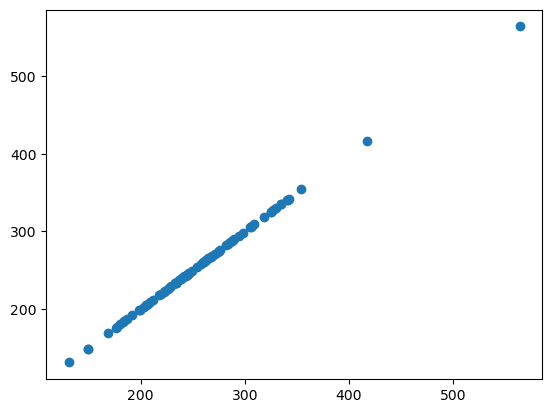

In [592]:
plt.scatter(y_test, y_pred)

### iii. For Classification: Predict target (presence of heart disease) as the target variable

## Logistic Regression

In [596]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score

In [598]:
y=df['target']
X=df.drop("target", axis=1)

In [600]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)

In [602]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

C:\Users\NAYANA\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [604]:
print('accuracy:', accuracy_score(y_pred_knn, y_test))
print('precision:', precision_score(y_pred_knn, y_test, average='weighted'))
print('recall:', recall_score(y_pred_knn, y_test, average='weighted'))
print('f1_score:', f1_score(y_pred_knn, y_test, average='weighted'))

accuracy: 0.639344262295082
precision: 0.7367863199547766
recall: 0.639344262295082
f1_score: 0.6547723132969034


## KNN

In [607]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn=knn.predict(X_test)

In [609]:
print('accuracy:', accuracy_score(y_pred_knn, y_test))
print('precision:', precision_score(y_pred_knn, y_test, average='weighted'))
print('recall:', recall_score(y_pred_knn, y_test, average='weighted'))
print('f1_score:', f1_score(y_pred_knn, y_test, average='weighted'))

accuracy: 0.639344262295082
precision: 0.7367863199547766
recall: 0.639344262295082
f1_score: 0.6547723132969034


## Naive Bayes

In [613]:
from sklearn.naive_bayes import GaussianNB

In [619]:
nb_classifier = GaussianNB()

In [621]:
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [623]:
y_pred_NB=nb_classifier.predict(X_test)

In [625]:
print('accuracy:', accuracy_score(y_pred_knn, y_test))
print('precision:', precision_score(y_pred_knn, y_test, average='weighted'))
print('recall:', recall_score(y_pred_knn, y_test, average='weighted'))
print('f1_score:', f1_score(y_pred_knn, y_test, average='weighted'))

accuracy: 0.639344262295082
precision: 0.7367863199547766
recall: 0.639344262295082
f1_score: 0.6547723132969034
